# A/B testing

### Main goal of the research:

The main goal is to evaluate if the new payment funnel of the international online store is leading to a higher conversion rate. 
The online store expects an increase of at least 10% in conversion on all stages within 14 days.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
np.random.seed(42)

In [2]:
# getting the data
marketing_events = pd.read_csv('ab_project_marketing_events_us.csv')
users = pd.read_csv('final_ab_new_users_upd_us.csv')
user_events = pd.read_csv('final_ab_events_upd_us.csv')
participants = pd.read_csv('final_ab_participants_upd_us.csv')

## 1. Data Exploration

##### 1.1 Exploring marketing_events

In [3]:
#first 5 rows to get an overview
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
#evaluating Dtypes and size
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
# changing Dtypes of start and finish to datetime
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [6]:
#checking for missing values
marketing_events.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [7]:
#checking for completely duplicate rows
marketing_events.duplicated().sum()

0

In [8]:
#order events chronologically
marketing_events = marketing_events.sort_values('start_dt')
marketing_events.head()

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19


##### 1.2 Exploring users

In [9]:
# first 5 rows to get an overview
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [10]:
#evaluating Dtypes and size
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [11]:
#changing first_date column to datetime and region and device to categorical type
users['first_date'] = pd.to_datetime(users['first_date'])
users['region'] = users['region'].astype('category')
users['device'] = users['device'].astype('category')

In [12]:
#checking for missing values
users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [13]:
#checking for completely duplicate rows
users.duplicated().sum()

0

##### 1.3 Exploring user_events

In [14]:
#first 5 rows to get an overview
user_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [15]:
#evaluating Dtypes and size
user_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [16]:
#changing event_dt object to datetime and event_name to category
user_events['event_dt'] = pd.to_datetime(user_events['event_dt'])
user_events['event_name'] = user_events['event_name'].astype('category')

In [17]:
# checking for missing values
user_events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [18]:
# origin of missing values
user_events['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

Only the purchase events have details displayed, in this case it is the price in USD. As all other events are non-cash, missing values are displayed. We will leave the column as it is. It does not make sense to delete the missing values because of their importance and because there are so many missing values. Replacing the NaN values by 0 would manipualte any calculations on the details column (e.g. average price etc.).

In [19]:
#checking for completely duplicate rows
user_events.duplicated().sum()

0

##### 1.4 Exploring participants

In [20]:
#first 5 rows to get an overview
participants.head()

,user_id,group,ab_test
9349,E0F6A9ACBA17FFA1,B,interface_eu_test


In [21]:
#checking for Dtypes and size
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [22]:
# changing group and ab_test to categorical datatypes
participants['group'] = participants['group'].astype('category')
participants['ab_test'] = participants['ab_test'].astype('category')

In [23]:
# checking for missing values
participants.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [24]:
#checking for completely duplicate rows
participants.duplicated().sum()

0

In [25]:
# checking for duplicate user ids
participants['user_id'].duplicated().sum()

887

In [26]:
# checking for the maximum number a user_id appears
participants['user_id'].value_counts()

307C06C0E6F09B93    2
74C5CCDA7DF761EE    2
6445624A3AE163E6    2
3A6D88AB973BD99D    2
C1E43A9B1D675927    2
                   ..
B39C1D7760CF809C    1
4E6C94A7969F5079    1
7EEEA8AA76EC8703    1
9EC259921F8521B1    1
79F9ABFB029CF724    1
Name: user_id, Length: 13638, dtype: int64

In [27]:
# checking if the duplicate user_ids are in different samples or in the same sample
p1 = participants.query('ab_test == "recommender_system_test"')
p1['user_id'].duplicated().sum()

0

In [28]:
# checking if the duplicate user_ids are in different samples or in the same sample
p2 = participants.query('ab_test == "interface_eu_test"')
p2['user_id'].duplicated().sum()

0

We could see that there are 887 duplicate user ids. Luckily, there are only distinct user ids per sample. It would have been mre problematic if there was the same user id in group A and group B of the same test.

## 2. Analysis

##### 2.1 Analyzing marketing_events

In [29]:
marketing_events

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [30]:
# adding month columns to better see the relevance for our hypothesis test in December
# printing the events which start and end in December
marketing_events['start_month'] = marketing_events['start_dt'].dt.month
marketing_events['finish_month'] = marketing_events['finish_dt'].dt.month
print('{} event(s) start in December.'.format(marketing_events['start_month'].value_counts()[12]))
print('{} event(s) finish in December.'.format(marketing_events['finish_month'].value_counts()[12]))

2 event(s) start in December.
1 event(s) finish in December.


We can see that only 2 events were launched in December and only one of them in Europe. Also, they both started at the very end of December. The Black Friday Campaign was started in November and ended in December, but already on the first day in December.

As the hypothesis test was launched on 2020-12-07 and ended on 2021-01-01, the impact of marketing events will potentially be small as only the 'Christmas&New Year Promo' will partly fall in that time window. 

The importance of the marketing_events table will also be further derived from the analysis of the other three tables.

In [31]:
# number of events which are relevant for the european market in general as the audience is european too
print('A total of {} marketing events take place in Europe.'.format(marketing_events[marketing_events['regions'].str.contains('EU')].count()[0]))

A total of 7 marketing events take place in Europe.


##### 2.2 Analyzing users

In [32]:
users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


In [33]:
#getting first and last date to check against test description
print('The earliest date in the table is {}. Expected to be the launch date 2020-12-07.'.format(users['first_date'].min()))
print('The last date in the table is {}. Expected to be the stop date 2020-12-21.'.format(users['first_date'].max()))

The earliest date in the table is 2020-12-07 00:00:00. Expected to be the launch date 2020-12-07.
The last date in the table is 2020-12-23 00:00:00. Expected to be the stop date 2020-12-21.


In [34]:
# analyzing how many users were taken after the stop date in the technical description
print('There were {} new users taken after the 2020-12-21.'.format(users[users['first_date'] > '2020-12-21' ].count()[1]))

There were 5263 new users taken after the 2020-12-21.


In [35]:
# drop new users who joined after 2021-12-21 in order to match technical description and ensure data consistency.
users = users[users['first_date'] < '2020-12-22']

In [36]:
#users who come from EU(audience is supposed to be 15% of new users from EU and expected number of test participtats is 6000)
print('Number of new users from the EU: {}'.format(users['region'].value_counts()['EU']))

Number of new users from the EU: 39466


This number makes sense as 15% of 39466 roughly eqaul the 6000 test participants of the technical description.

##### 2.3 Analyzing user_events 
##### Note: Analysis is solely conducted on this table. Later joins or merges with other tables are not taken into consideration here.

In [37]:
user_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [38]:
#number of events per event_name
user_events['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

It totally makes sense that login events are displayed most frequently because not every login will lead to a purchase and even if one wants to purchase, he or she still needs to login before. 
One interesting thing to note is that the number of puchases exceeds the number of product cart views. To further investigate this conspicuousness, we would need to take a look at the actual website.

In [39]:
# examining purchasing price
user_events.query('event_name == "purchase"')['details'].describe()

count    60314.000000
mean        23.881219
std         72.228884
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64

We can see a wide range of prices. The mean of avout 23 indicates that most products are sold for a rather low amout of money which can be also seen be the percentiles. It will be interesting to see if the new payment funnel will not only lead to more purchases but also to more revenue per purchase.

In [40]:
# creating a column for the hour to see most active user hours
user_events['hour'] = user_events['event_dt'].dt.hour

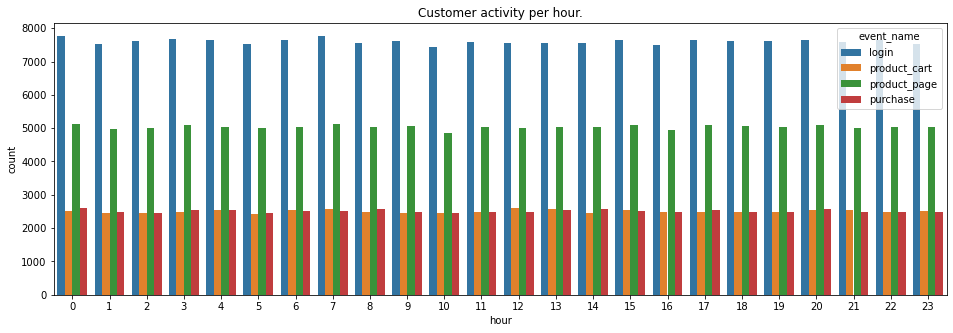

In [41]:
plt.figure(figsize=(16,5))
sb.countplot(data=user_events, x='hour', hue='event_name')
plt.title('Customer activity per hour.');

We can almost see no peak hours in the graph. The users are acive all the time (which makes sense for an online shop with users all around the world with different time zones): 

##### 2.4 Analyzing participants

In [42]:
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [43]:
# examining the size of the two tests
participants.ab_test.value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

In [44]:
participants[participants['ab_test'] == 'interface_eu_test']['group'].value_counts()

A    5467
B    5383
Name: group, dtype: int64

In [45]:
participants[participants['ab_test'] == 'recommender_system_test']['group'].value_counts()

A    2747
B     928
Name: group, dtype: int64

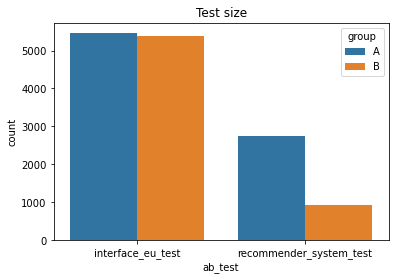

In [46]:
sb.countplot(data=participants, x='ab_test',hue='group')
plt.title('Test size');

If one goes by the technical description, the recommender_system_test is the test of interest for us. The problem is that its size is rather small and not even close to the expected number of participants. 
Unlike the interface_eu_test, group B only makes up 25% of the total test size in the reommender_system_test.

## 3. A/B test preparation

In [47]:
participants = participants[participants['ab_test'] == 'recommender_system_test']

In [48]:
#getting a quick overview about the tables
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [49]:
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [50]:
user_events.head()

,user_id,event_dt,event_name,details,hour
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,20
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,9
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,12
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,4
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,10


In [51]:
# setting user_id as index
participants.set_index('user_id')
users.set_index('user_id')
user_events.set_index('user_id');

In [52]:
# merge participants and users
df_pre = pd.merge(participants, users)

In [53]:
# merge user_events with the predefined df
df_final = pd.merge(df_pre, user_events)

In [54]:
# copy dataframe
df = df_final.copy()

In [55]:
df.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,hour
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,14
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,14
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,14
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,login,NaN,14
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN,15


In [56]:
# re-checking if resutling dataframe is correct and makes sense
print(df['ab_test'].value_counts())
print(df['first_date'].max())
print(df['first_date'].min())
print(df['region'].value_counts())
print(df['event_dt'].min())
print(df['event_dt'].max())

recommender_system_test    23909
interface_eu_test              0
Name: ab_test, dtype: int64
2020-12-21 00:00:00
2020-12-07 00:00:00
EU           22674
N.America      804
APAC           225
CIS            206
Name: region, dtype: int64
2020-12-07 00:05:57
2020-12-30 12:42:57


In [57]:
# only keeping EU users
df = df[df['region'] == 'EU']

In [58]:
# getting rid of redundant columns
df = df.drop(['ab_test', 'region', 'device', 'details', 'hour'], axis=1)

In [59]:
# checking resulting df
df.head()

,user_id,group,first_date,event_dt,event_name
0,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,purchase
1,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:29,product_cart
2,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,product_page
3,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,login
4,A7A3664BD6242119,A,2020-12-20,2020-12-20 15:46:06,product_page


In [60]:
# ensuring to only keep customers who took action within first 14 days after signing up (as specified in techincal description)
df['event_dt'] = df['event_dt'].dt.date
df['first_date'] = df['first_date'].dt.date

In [61]:
# create new column to check for the 14-days difference
df['difference_signup_and_action'] = df['event_dt'].values - df['first_date'].values

In [62]:
# see if there is anyone with more than 14 days 
df['difference_signup_and_action'].value_counts()

0 days     7719
1 days     3559
2 days     2451
3 days     1712
4 days     1217
5 days     1068
6 days      926
7 days      853
8 days      686
9 days      524
10 days     414
12 days     336
11 days     250
13 days     237
14 days     205
15 days     156
16 days      75
17 days      67
20 days      62
19 days      54
18 days      39
21 days      31
22 days      29
23 days       4
Name: difference_signup_and_action, dtype: int64

In [63]:
# get rid off customers with more than 14 days
df = df[df['difference_signup_and_action'] < '15 days']

In [64]:
#confirm
df['difference_signup_and_action'].value_counts()

0 days     7719
1 days     3559
2 days     2451
3 days     1712
4 days     1217
5 days     1068
6 days      926
7 days      853
8 days      686
9 days      524
10 days     414
12 days     336
11 days     250
13 days     237
14 days     205
Name: difference_signup_and_action, dtype: int64

In [65]:
# get rid off all date columns as there are no longer needed and irrelevant for the final A/B testing
df = df.drop(['first_date', 'event_dt','difference_signup_and_action'], axis=1)

## 4. A/B Testing

In [66]:
# take a look at the final dataframe
df.sample(5)

,user_id,group,event_name
16767,A3AD6954A1CBD2AF,A,product_page
2711,5EC51E72CB294EC8,A,product_page
22009,60EA3F74525C4208,A,login
20291,AC4F0C6F72419245,A,purchase
22029,BBBFC0C64CC3C05D,A,product_page


##### 4.1 Testing for product page conversion

H0: control_group's product_page conversion >= experiment's group product_page conversion

H1: control_group's product_page conversion < experiment's group product_page conversion

In [67]:
#splitting the groups and testing for product_page conversion
control_pp= df.query('group == "A"')['event_name'].value_counts(normalize=True)[1]
experiment_pp= df.query('group == "B"')['event_name'].value_counts(normalize=True)[1]
control_pp, experiment_pp

(0.285031938769638, 0.2589958158995816)

In [68]:
#compute observed difference in product page conversion
obs_diff_pp = experiment_pp - control_pp
obs_diff_pp

-0.02603612287005641

In [69]:
#create sampling distribution of difference in product page conversion with bootstrapping
diffs_pp = []
size = df.shape[0]
for i in range(1000):
    sample = df.sample(size, replace=True)
    control_pp_sample = sample.query('group == "A"')['event_name'].value_counts(normalize=True)[1]
    experiment_pp_sample = sample.query('group == "B"')['event_name'].value_counts(normalize=True)[1]
    diffs_pp.append(experiment_pp_sample - control_pp_sample)

In [70]:
#convert to numpy array
diffs_pp = np.array(diffs_pp)

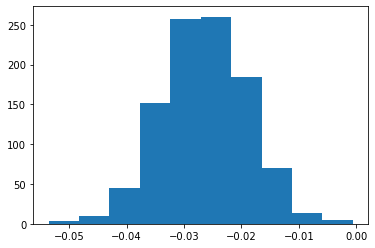

In [71]:
# plot sampling distribution
plt.hist(diffs_pp);

In [72]:
#simulating distribution under the null hypothesis
null_vals_pp = np.random.normal(0, diffs_pp.std(), diffs_pp.size)

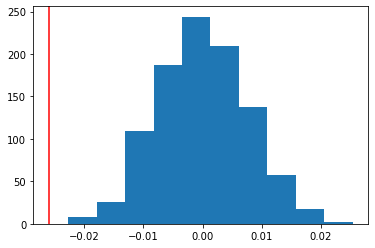

In [73]:
#plot null distribution
plt.hist(null_vals_pp);

#plot line for observed statistic
plt.axvline(obs_diff_pp, c='red');

In [74]:
# compute p value
(null_vals_pp > obs_diff_pp).mean()

1.0

H0 can not be rejected! The new payment funnel seems to have a negative effect on conversion is not even close to increase conversion by 10% at this stage.

##### 4.2 Testing for product cart conversion

H0: control_group's product_cart conversion >= experiment's group product_cart conversion

H1: control_group's product_cart conversion < experiment's group product_cart conversion

In [75]:
#splitting the groups and testing for product_cart conversion (note that the difference in index is due to the fact 
# that in the control group, we have more purchasing than product cart views)
control_pc= df.query('group == "A"')['event_name'].value_counts(normalize=True)[3]
experiment_pc= df.query('group == "B"')['event_name'].value_counts(normalize=True)[2]
control_pc, experiment_pc

(0.13327962248949762, 0.1294979079497908)

In [76]:
#compute observed difference in product page conversion
obs_diff_pc = experiment_pc - control_pc
obs_diff_pc

-0.0037817145397068264

In [77]:
#create sampling distribution of difference in product cart conversion with bootstrapping
diffs_pc = []
size = df.shape[0]
for i in range(1000):
    sample = df.sample(size, replace=True)
    control_pc_sample = sample.query('group == "A"')['event_name'].value_counts(normalize=True)[1]
    experiment_pc_sample = sample.query('group == "B"')['event_name'].value_counts(normalize=True)[1]
    diffs_pc.append(experiment_pc_sample - control_pc_sample)

In [78]:
#convert to numpy array
diffs_pc = np.array(diffs_pc)

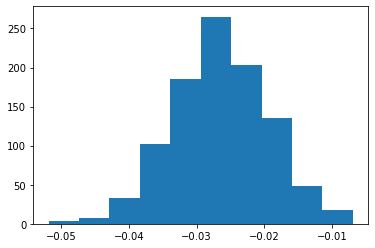

In [79]:
# plot sampling distribution
plt.hist(diffs_pc);

In [80]:
#simulating distribution under the null hypothesis
null_vals_pc = np.random.normal(0, diffs_pc.std(), diffs_pc.size)

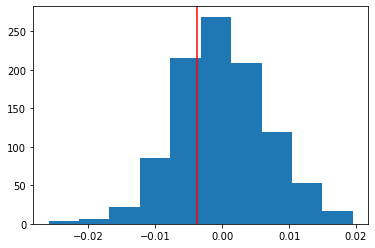

In [81]:
#plot null distribution
plt.hist(null_vals_pc);

#plot line for observed statistic
plt.axvline(obs_diff_pc, c='red');

In [82]:
# compute p value
(null_vals_pc > obs_diff_pc).mean()

0.697

H0 can not be rejected! The new payment funnel seems to have a negative effect on conversion is not even close to increase conversion by 10% at this stage.

##### 4.3 Testing for purchase conversion

H0: control_group's purchase conversion >= experiment's group purchase conversion

H1: control_group's purchase conversion < experiment's group purchase conversion

In [83]:
#splitting the groups and testing for purchase conversion (note that the difference in index is due to the fact 
# that in the control group, we have more purchasing than product cart views)
control_pu= df.query('group == "A"')['event_name'].value_counts(normalize=True)[2]
experiment_pu= df.query('group == "B"')['event_name'].value_counts(normalize=True)[3]
control_pu, experiment_pu

(0.13822869310007482, 0.12887029288702928)

In [84]:
#compute observed difference in product page conversion
obs_diff_pu = experiment_pu - control_pu
obs_diff_pu

-0.009358400213045542

In [85]:
#create sampling distribution of difference in purchase conversion with bootstrapping
diffs_pu = []
size = df.shape[0]
for i in range(1000):
    sample = df.sample(size, replace=True)
    control_pu_sample = sample.query('group == "A"')['event_name'].value_counts(normalize=True)[1]
    experiment_pu_sample = sample.query('group == "B"')['event_name'].value_counts(normalize=True)[1]
    diffs_pu.append(experiment_pu_sample - control_pu_sample)

In [86]:
#convert to numpy array
diffs_pu = np.array(diffs_pu)

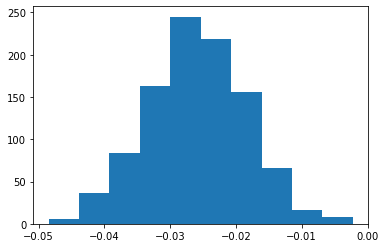

In [87]:
# plot sampling distribution
plt.hist(diffs_pu);

In [88]:
#simulating distribution under the null hypothesis
null_vals_pu = np.random.normal(0, diffs_pu.std(), diffs_pu.size)

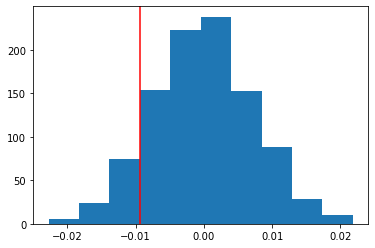

In [89]:
#plot null distribution
plt.hist(null_vals_pu);

#plot line for observed statistic
plt.axvline(obs_diff_pu, c='red');

In [90]:
# compute p value
(null_vals_pu > obs_diff_pu).mean()

0.894

H0 can not be rejected! The new payment funnel seems to have a negative effect on conversion is not even close to increase conversion by 10% at this stage.

## 5. Conclusions and Evaluation

Wow, that were some messy but also interesting and challenging datasets. It really seems that our new watermelon farmers left right in the middle of the test precedure. Eventhough there was almost no missing data and no important duplicates, I still had to make lots of assumptions, especially with regard to the final A/B testing results.
I have finally decided to not include the marekting events in any of the A/B testing because there was too much uncertainty about other parts. The participants table included two different tests, the recommender_system_test (as indicated in the technical description) and the eu_interface_test. This second test incorporated a much larger sample size than the recommendation test, but as there was given no context, it would have been negligent to use the interface_eu_test data just to get a larger sample size.

The expected number of participants of 6000 couldn't be met because some filtering was necessary in order to include some other specifications (e.g. only EU-members, only 14 days after sign-up etc.).

The final A/B test results were very clear. The new payment channel of the experiment group B couldn't help to increase conversion and even made it worse.
If I remember correctly, I should have also included some methods like the Bonfferoni correction in order to make up for the fact that we analyzed 3 different metrics but this wouldn't have helped to achieve more significant results.

All in all, still a very interesting task with many possible solutions in my opinion. It really depends on the assumptions and the consistency.